# Data Sci Eng Methods
# Assignment 1 – ML Data Cleaning and Feature Selection

# Abstract

Hello! ,In this notebook I will analyze the adult incom dataset to understand the important characteristics that affect the level of salary and predict it.

 The notebook has used statistical methods like p-value, t-statistics and visualization techniques like histogram, Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the dataset
 
*     What are the data types? (Only numeric and categorical)

*     Are there missing values?

*     What are the likely distributions of the numeric variables?

*     Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

*     Which independent variables have missing data? How much?

*         Do the training and test sets have the same data?

*         In the predictor variables independent of all the other predictor variables?

*         Which predictor variables are the most important?

*         Do the ranges of the predictor variables make sense?

*         What are the distributions of the predictor variables?

*         Remove outliers and keep outliers (does if have an effect of the final predictive model)?

*     Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("../input/adult-income-eda/adult.data.csv")

In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Data Cleaning & Arranging
 As we can see that in our data the header is missing and thats why it is containing the 1st row as index, so we will provide our data the proper headers along with their column names

In [4]:
df = pd.read_csv("../input/adult-income-eda/adult.data.csv", header = None,names=["age","workclass","pincode","education","education-num","martial-status","occupation","relationship","race","sex","capital-gain","capital-loss","hpw","country","salary"])

In [5]:
#Viewing data in the file 
df.head()

,age,workclass,pincode,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hpw,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


we add the column name for the dataset

In above column **hpw = hours per week**

In [6]:
df.shape

(32561, 15)

In [7]:
#checking if the any data is missing
df.isnull().sum()

age               0
workclass         0
pincode           0
education         0
education-num     0
martial-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hpw               0
country           0
salary            0
dtype: int64

 **No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data**

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x360 with 0 Axes>

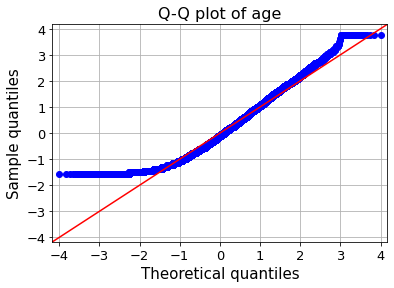

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x360 with 0 Axes>

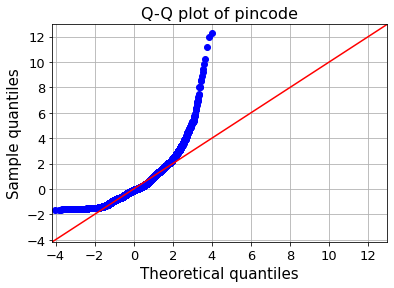

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x360 with 0 Axes>

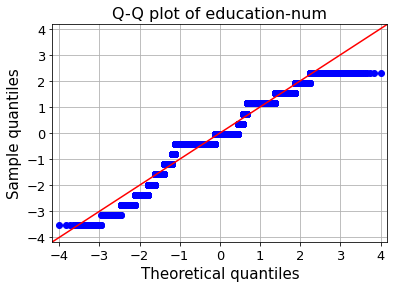

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x360 with 0 Axes>

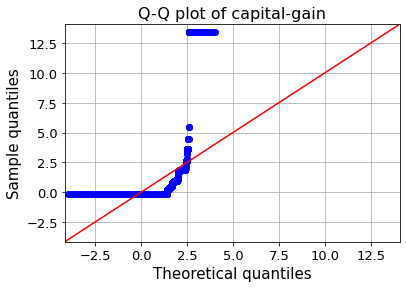

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x360 with 0 Axes>

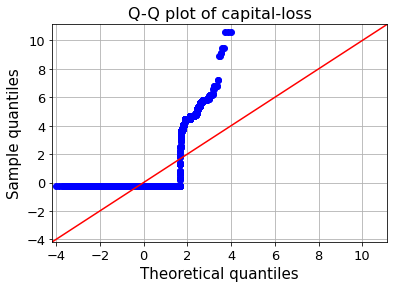

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x360 with 0 Axes>

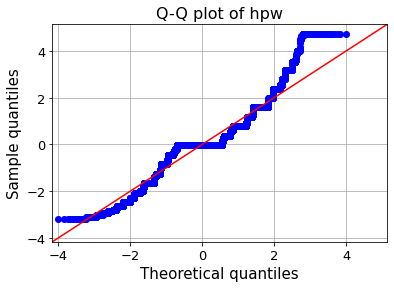

In [8]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=df[['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss',
       'hpw']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

Aparrently, age, education-num,hpw is likely a normal distribution

there are some predictor variables that is unlikely a normal distribution included capital-gain,capitcal-loss.



<AxesSubplot:>

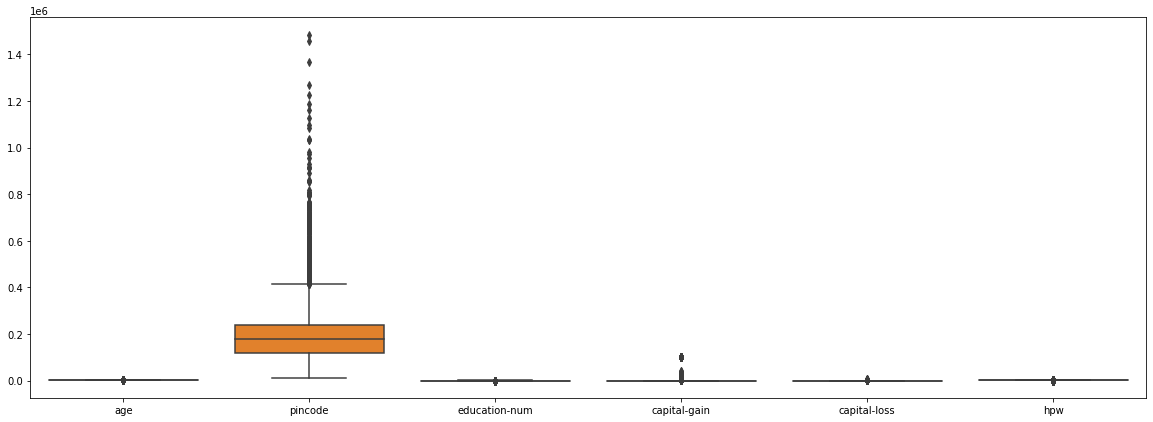

In [9]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=df)

It is hard to visualize and read data as they are not in same ranges, I'll try to normalize the data for a better understanding and visualization. 

It will also help later to get normalized coeffiecients when building the Model.

so we need normalized each column make sure they are in the same range.

# Data transforming, Feature creation and Analysis

In [10]:
#Creating binary variables for sex 

df = pd.get_dummies(df,columns= ['sex','salary'])
df.head()


,age,workclass,pincode,education,education-num,martial-status,occupation,relationship,race,capital-gain,capital-loss,hpw,country,sex_ Female,sex_ Male,salary_ <=50K,salary_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,0,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,0,1,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,0,1,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,0,1,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,1,0,1,0


In [11]:

# Normalizing the data in the each column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

for column_name in ['age','pincode','education-num','capital-gain','capital-loss','hpw']:
    # Create x to store scaled values as floats
    x = df[[column_name]].values.astype(float)

    # Preparing for normalizing
    min_max_scaler = preprocessing.MinMaxScaler()

    # Transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)

    # Run the normalizer on the dataframe
    df[[column_name]] = pd.DataFrame(x_scaled)

In [12]:
#data after nromalizing and feature creation
df.head()

,age,workclass,pincode,education,education-num,martial-status,occupation,relationship,race,capital-gain,capital-loss,hpw,country,sex_ Female,sex_ Male,salary_ <=50K,salary_ >50K
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,0.02174,0.0,0.397959,United-States,0,1,1,0
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,0.00000,0.0,0.122449,United-States,0,1,1,0
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,0.00000,0.0,0.397959,United-States,0,1,1,0
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.00000,0.0,0.397959,United-States,0,1,1,0
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,0.00000,0.0,0.397959,Cuba,1,0,1,0


<AxesSubplot:>

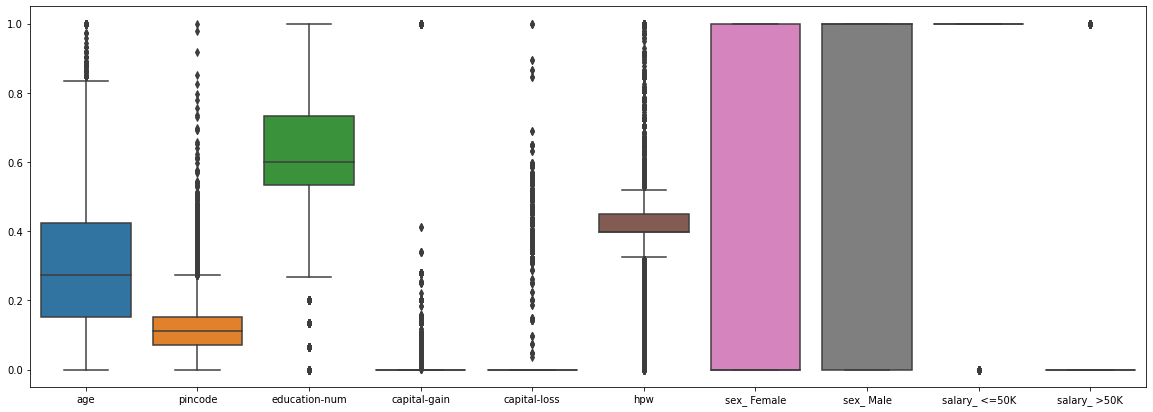

In [13]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.boxplot(data=df)

The income group is concentrated between the ages of 18 and 40, and salaries are concentrated below 50k, with very few outliers reaching above 50k. The data range is within a reasonable range

As you can see from the pincode, the working population is concentrated in some states, in line with the population distribution

Education level is mainly concentrated in about 0.55-0.75 (9.1-12.5 years), which is more in line with the common sense of life

50% of the population still works about 40 hours a week

From the investment anomaly to get out of 0 can be seen, through the investment of profits or losses belong to a very small number of people, which is also very consistent with our perception of investment

The survey population was evenly distributed between men and women

In [14]:
#checking the correlation between all the features in the data
df.corr()

,age,pincode,education-num,capital-gain,capital-loss,hpw,sex_ Female,sex_ Male,salary_ <=50K,salary_ >50K
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,-0.088832,0.088832,-0.234037,0.234037
pincode,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.026858,0.026858,0.009463,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,-0.012280,0.012280,-0.335154,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,-0.048480,0.048480,-0.223329,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,-0.045567,0.045567,-0.150526,0.150526
hpw,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,-0.229309,0.229309,-0.229689,0.229689
sex_ Female,-0.088832,-0.026858,-0.012280,-0.048480,-0.045567,-0.229309,1.000000,-1.000000,0.215980,-0.215980
sex_ Male,0.088832,0.026858,0.012280,0.048480,0.045567,0.229309,-1.000000,1.000000,-0.215980,0.215980
salary_ <=50K,-0.234037,0.009463,-0.335154,-0.223329,-0.150526,-0.229689,0.215980,-0.215980,1.000000,-1.000000
salary_ >50K,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,-0.215980,0.215980,-1.000000,1.000000


<AxesSubplot:>

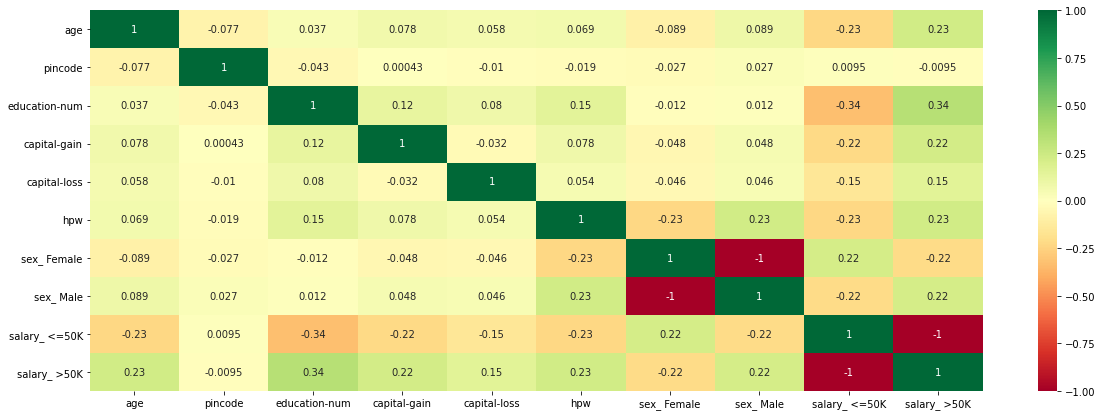

In [15]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

From the above table, it can be seen that for predicting salary level, the most relevant factors are education-num,age,hpw,capital-gain,

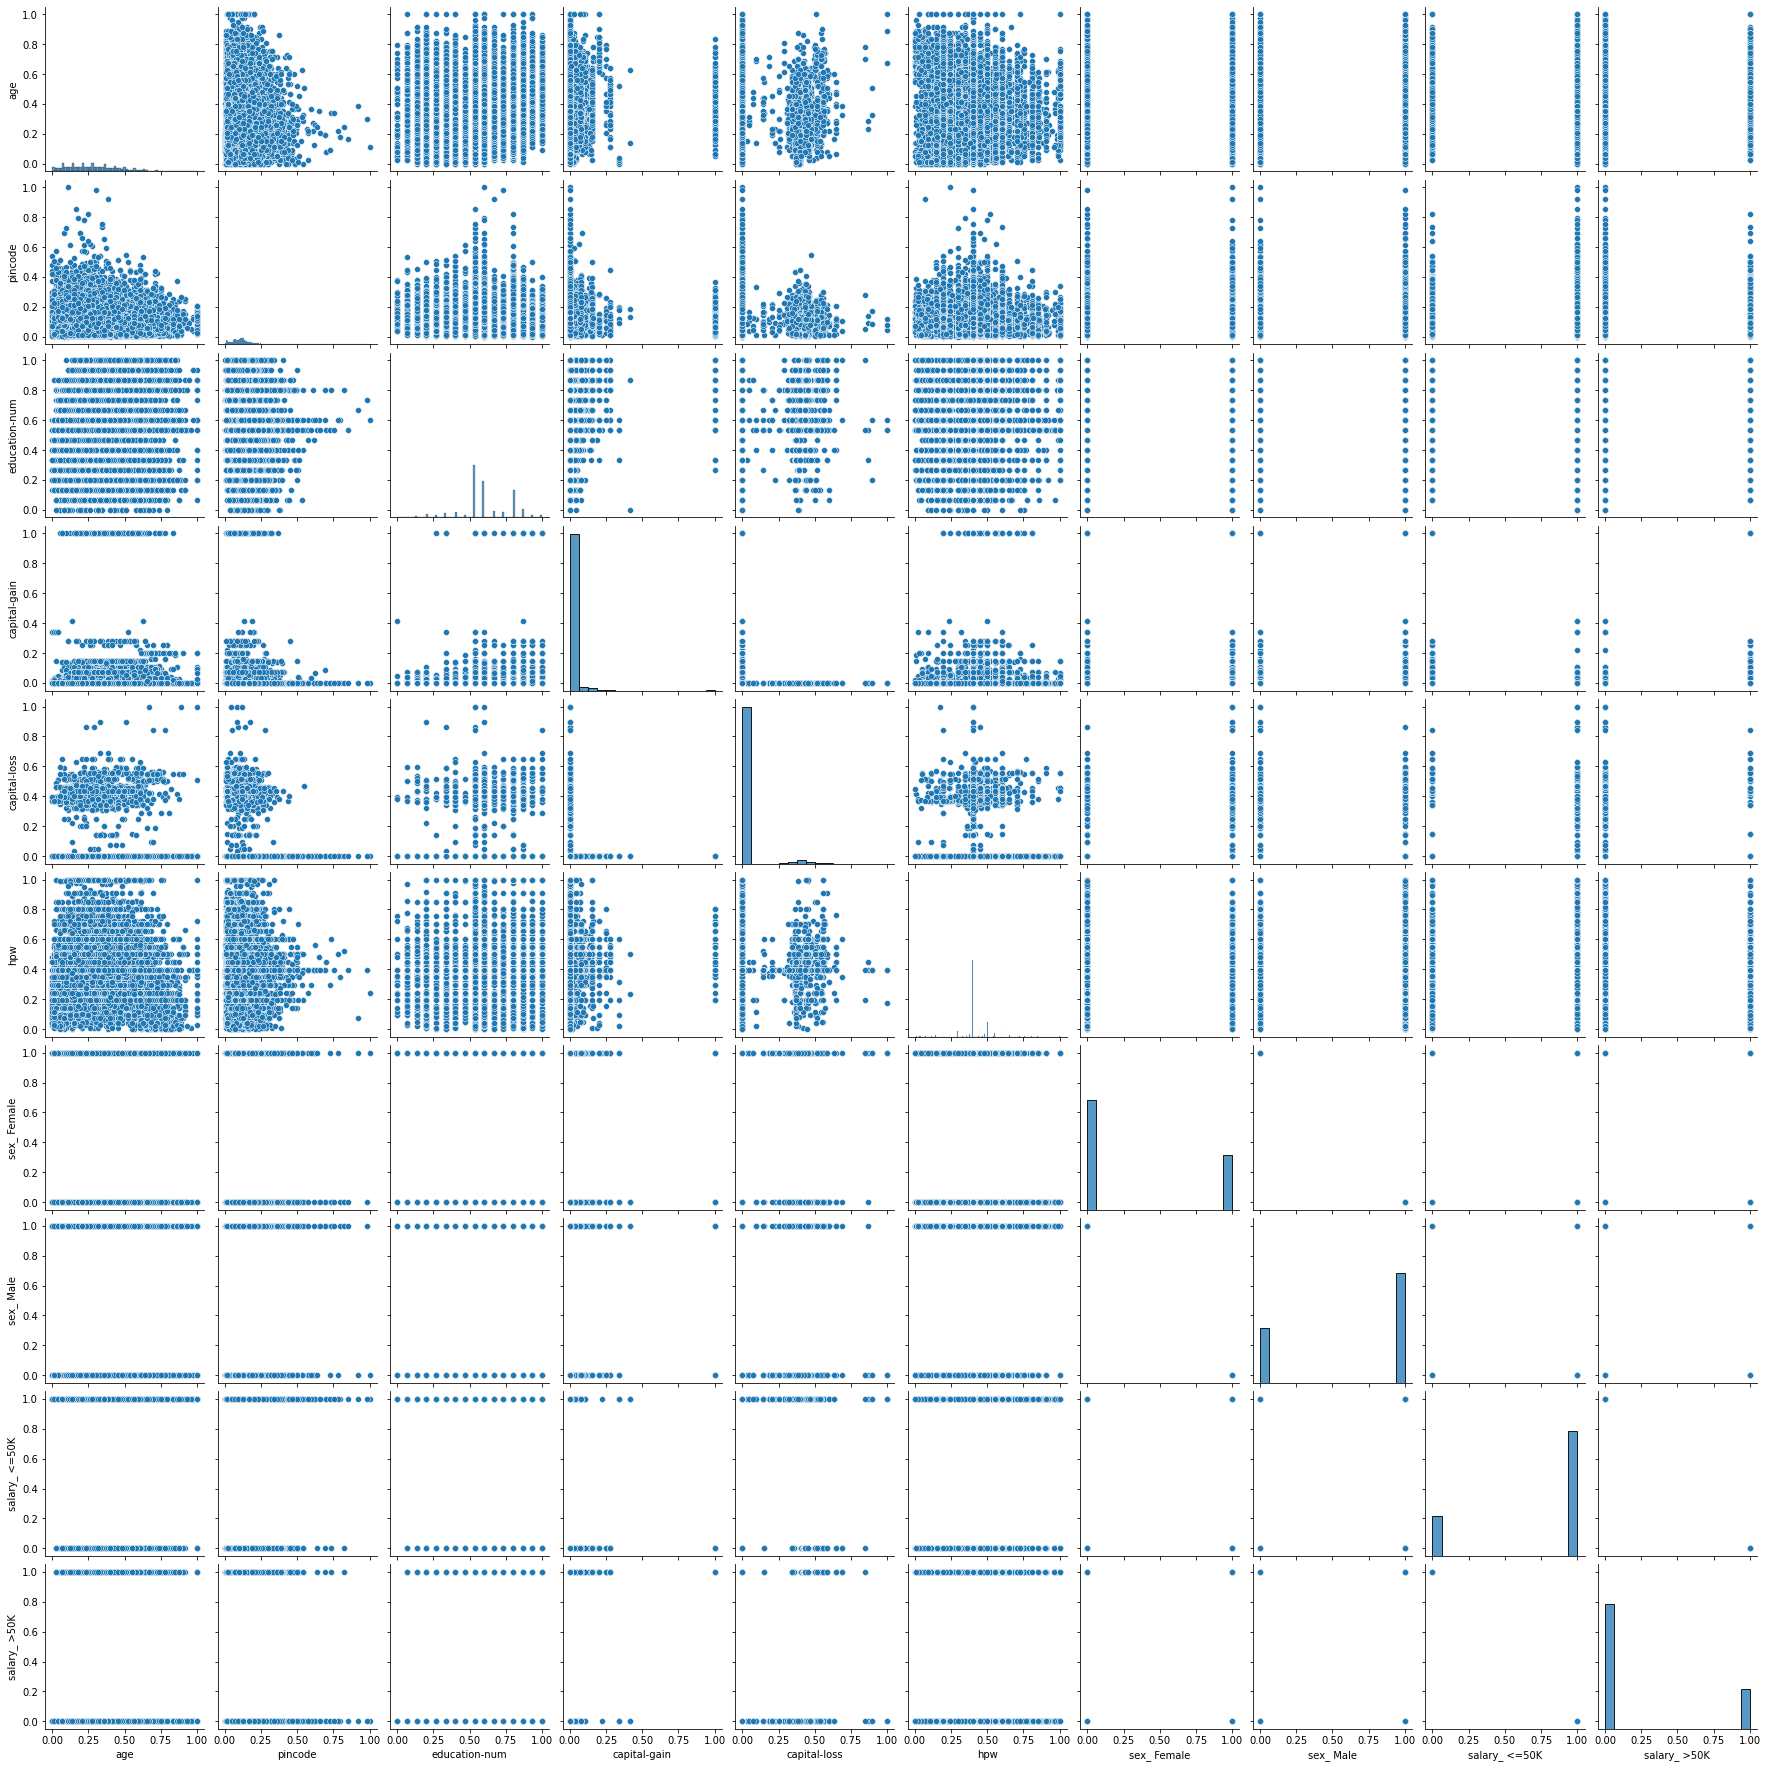

In [16]:
#pair plot to check the colinearity
sns.pairplot(df) 

From the pair plot and heat map, we can see that age, pincode education-num, capital-gain ,capital-loss and hpw are independent of each other without correlation.

# Identifing predictor significance

In [17]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df['salary_ >50K'], df[['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss',
       'hpw', 'sex_ Female','sex_ Male']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           salary_ >50K   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     1557.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:26:02   Log-Likelihood:                -13836.
No. Observations:               32561   AIC:                         2.769e+04
Df Residuals:                   32553   BIC:                         2.776e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
age               0.4212      0.011     37.897      0.000       0.399       0.443
pincode           0.0951      0.029      3.307      0.001       0.039       0.151
education-num     0.6999      0.012     57.259      0.000       0.676       0.724
capital-gain      0.9321      0.028     33.104      0.000       0.877       0.987
capital-loss      0.5040      0.022     22.565      0.000       0.460       0.548
hpw               0.4128      0.017     24.334      0.000       0.380       0.446
sex_ Female      -0.5995      0.011    -56.147      0.000      -0.620      -0.579
sex_ Male        -0.4585      0.011    -41.429      0.000      -0.480      -0.437
==============================================================================
Omnibus:                     3146.627   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4005.755
Skew:                           0.846   Prob(JB):                         0.00
Kurtosis:                       2.699   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**the p value of columns is 0, hence each column of the above table is significant feature**

# Building the Model
# Train ,Validation and Test split

In [18]:
from sklearn.model_selection import  train_test_split

X = df[['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss',
       'hpw', 'sex_ Female','sex_ Male']]

y = df['salary_ >50K']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

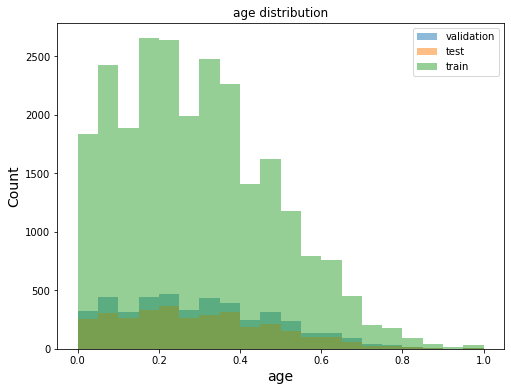

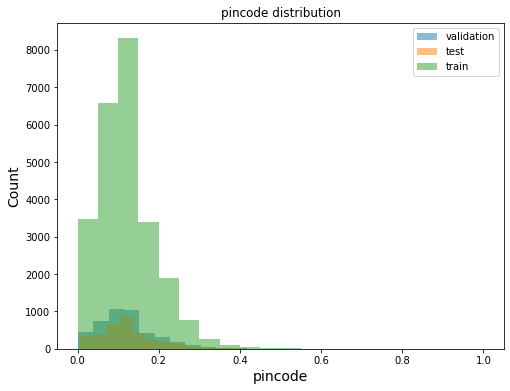

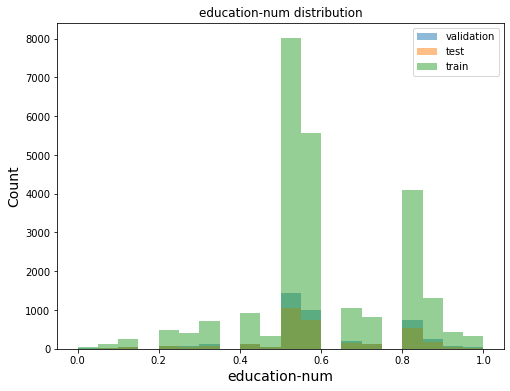

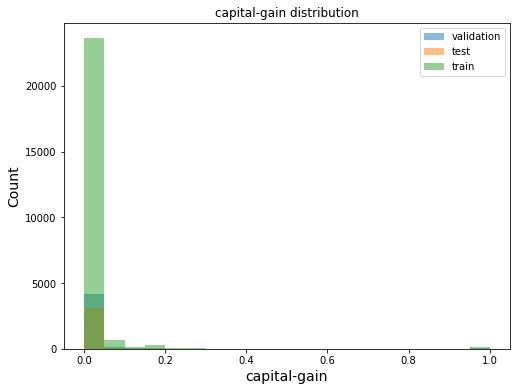

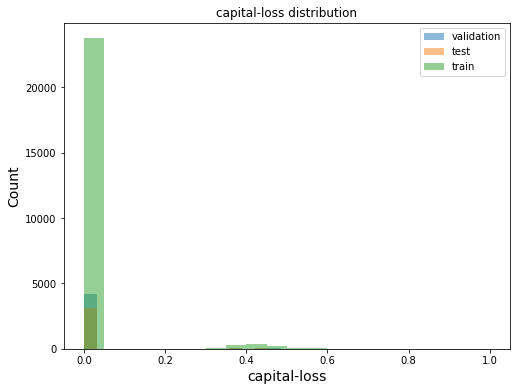

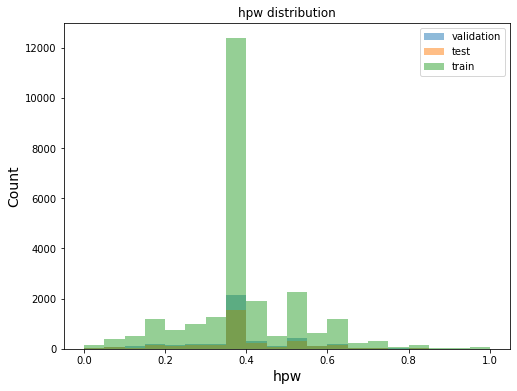

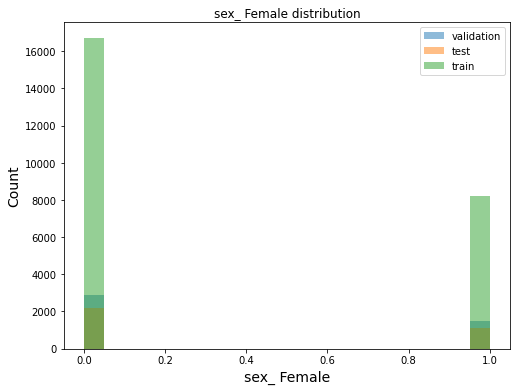

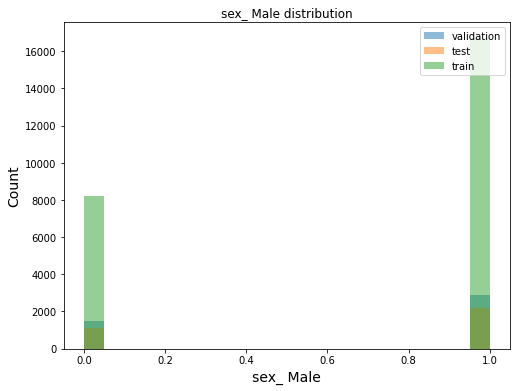

In [19]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss',
       'hpw', 'sex_ Female','sex_ Male']]

X_val_plot = X_val[['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss',
       'hpw', 'sex_ Female','sex_ Male']]

X_train_plot = X_train[['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss',
       'hpw', 'sex_ Female','sex_ Male']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

Some boundary data are missing in capital-loss capital-gain because the data are too unevenly distributed.

sex_ Feamale, sex_male do not have missing value

# Linear Regression

In [20]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

# Making predictions

In [21]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.14
Coefficient of determination: 0.25
R^2 score on tarining set = 0.24996729448372423


In [22]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.13
Coefficient of determination: 0.24
R^2 score on test set = 0.24362279603303238


In [23]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.14
Coefficient of determination: 0.26
R^2 score on validation set = 0.2582218855313385


# Understanding the important features

In [24]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1461 ± 0.0129,education-num
0.0729 ± 0.0140,age
0.0594 ± 0.0161,capital-gain
0.0273 ± 0.0038,capital-loss
0.0224 ± 0.0080,hpw
0.0104 ± 0.0039,sex_ Male
0.0088 ± 0.0023,sex_ Female
0.0007 ± 0.0007,pincode


From permutaion importance, the key factor that affects whether the income level can reach above 50k is the level of education.

# Remove data randomly

In [25]:
# remove 1% data randomly 
df_part_1per = df[['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss','hpw', 'sex_ Female','sex_ Male']];
col_list = ['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss','hpw', 'sex_ Female','sex_ Male']
for col in col_list:
    df_part_1per.loc[df_part_1per.sample(frac=0.01).index, col] = pd.np.nan
    
# remove 5% data randomly 
df_part_5per = df[['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss','hpw', 'sex_ Female','sex_ Male']];
for col in col_list:
    df_part_5per.loc[df_part_5per.sample(frac=0.05).index, col] = pd.np.nan

# remove 10% data randomly 
df_part_10per = df[['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss','hpw', 'sex_ Female','sex_ Male']];
for col in col_list:
    df_part_10per.loc[df_part_10per.sample(frac=0.10).index, col] = pd.np.nan

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pa

In [26]:
#checking percent of misssing data
df_part_1per.isnull().sum()


age              326
pincode          326
education-num    326
capital-gain     326
capital-loss     326
hpw              326
sex_ Female      326
sex_ Male        326
dtype: int64

In [27]:
#checking percent of misssing data
df_part_5per.isnull().sum()

age              1628
pincode          1628
education-num    1628
capital-gain     1628
capital-loss     1628
hpw              1628
sex_ Female      1628
sex_ Male        1628
dtype: int64

In [28]:
#checking percent of misssing data
df_part_10per.isnull().sum()

age              3256
pincode          3256
education-num    3256
capital-gain     3256
capital-loss     3256
hpw              3256
sex_ Female      3256
sex_ Male        3256
dtype: int64

# mean imputer for missing data

In [29]:
# 

from sklearn.impute import SimpleImputer
# 1%
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_part_1per)
imp_mean_df_1per = imp_mean.transform(df_part_1per)
imp_mean_df_1per = pd.DataFrame(imp_mean_df_1per,columns = ['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss','hpw', 'sex_ Female','sex_ Male'])
imp_mean_df_1per.isnull().sum()

# 5%
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_part_1per)
imp_mean_df_5per = imp_mean.transform(df_part_5per)
imp_mean_df_5per = pd.DataFrame(imp_mean_df_5per,columns = ['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss','hpw', 'sex_ Female','sex_ Male'])
imp_mean_df_5per.isnull().sum()

#10%
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_part_1per)
imp_mean_df_10per = imp_mean.transform(df_part_10per)
imp_mean_df_10per = pd.DataFrame(imp_mean_df_10per,columns = ['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss','hpw', 'sex_ Female','sex_ Male'])
imp_mean_df_10per.isnull().sum()

age              0
pincode          0
education-num    0
capital-gain     0
capital-loss     0
hpw              0
sex_ Female      0
sex_ Male        0
dtype: int64

**mean imputer compeletely cover the missing value.**

# most frequent imputer for missing data

In [30]:
# most frequent imputer for missing data

from sklearn.impute import SimpleImputer
# 1%
imp_freq = SimpleImputer(strategy='most_frequent')
imp_freq.fit(df_part_1per)
imp_freq_df_1per = imp_mean.transform(df_part_1per)
imp_freq_df_1per = pd.DataFrame(imp_freq_df_1per,columns = ['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss','hpw', 'sex_ Female','sex_ Male'])
imp_freq_df_1per.isnull().sum()

# 5%
imp_freq = SimpleImputer(strategy='most_frequent')
imp_freq.fit(df_part_1per)
imp_freq_df_5per = imp_mean.transform(df_part_5per)
imp_freq_df_5per = pd.DataFrame(imp_freq_df_5per,columns = ['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss','hpw', 'sex_ Female','sex_ Male'])
imp_freq_df_5per.isnull().sum()

#10%
imp_freq = SimpleImputer(strategy='most_frequent')
imp_freq.fit(df_part_1per)
imp_freq_df_10per = imp_mean.transform(df_part_10per)
imp_freq_df_10per = pd.DataFrame(imp_freq_df_10per,columns = ['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss','hpw', 'sex_ Female','sex_ Male'])
imp_freq_df_10per.isnull().sum()

age              0
pincode          0
education-num    0
capital-gain     0
capital-loss     0
hpw              0
sex_ Female      0
sex_ Male        0
dtype: int64

**most frequent imputer compeletely cover the missing value.**

# knn  imputer for missing data

In [31]:
# knn  imputer for missing data
from sklearn.impute import KNNImputer

# start the KNN training
imputer = KNNImputer(n_neighbors=2)
#1% missing value
imp_knn_df_1per = imputer.fit_transform(df_part_1per)
imp_knn_df_1per = pd.DataFrame(imp_knn_df_1per,columns = ['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss','hpw', 'sex_ Female','sex_ Male'])
imp_knn_df_1per.isnull().sum()

#5% missing value
imp_knn_df_5per = imputer.fit_transform(df_part_5per)
imp_knn_df_5per = pd.DataFrame(imp_knn_df_5per,columns = ['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss','hpw', 'sex_ Female','sex_ Male'])
imp_knn_df_5per.isnull().sum()

#10% missing value
imp_knn_df_10per = imputer.fit_transform(df_part_10per)
imp_knn_df_10per = pd.DataFrame(imp_knn_df_10per,columns = ['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss','hpw', 'sex_ Female','sex_ Male'])
imp_knn_df_10per.isnull().sum()

age              0
pincode          0
education-num    0
capital-gain     0
capital-loss     0
hpw              0
sex_ Female      0
sex_ Male        0
dtype: int64

**knn imputer compeletely cover the missing value.**

# get resident


In [32]:
#  a method to calculate residual  
def get_residual(expected,predicted):
    expected_only = []
    predicted_only = []
    residuals = []
    for colums, content in expected.items():
            for index in range(0,len(content)-1):
                if(expected[colums][index]!=predicted[colums][index]):
                    expected_only.append(expected[colums][index])
                    predicted_only.append(predicted[colums][index])
                    residuals.append(expected[colums][index]-predicted[colums][index])
    return expected_only,predicted_only,residuals

# 1% missing value

In [33]:

expected = df[['age', 'pincode', 'education-num', 'capital-gain', 'capital-loss','hpw', 'sex_ Female','sex_ Male']]
# mean imputation method
expected_only_mean,predicted_only_mean,residuals_mean = get_residual(expected,imp_mean_df_1per)

#most frequent imputation method
expected_only_freq,predicted_only_freq,residuals_freq = get_residual(expected,imp_freq_df_1per)

#knn imputation method
expected_only_knn,predicted_only_knn,residuals_knn = get_residual(expected,imp_knn_df_1per)

In [34]:
def add_plot(plt,predicted_only,residuals):
    return

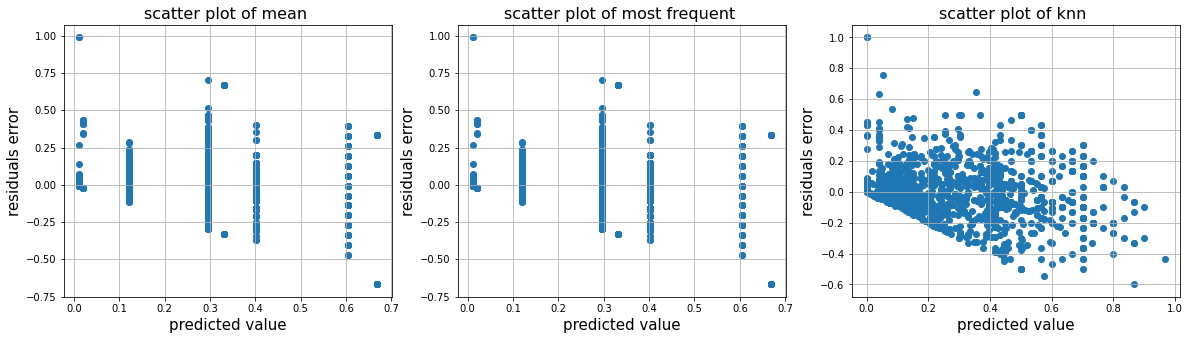

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(predicted_only_mean,residuals_mean)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of mean ".format(c),fontsize=16)
plt.grid(True)
plt.subplot(1,3,2)
plt.scatter(predicted_only_freq,residuals_mean)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of most frequent ",fontsize=16)
plt.grid(True)
plt.subplot(1,3,3)
plt.scatter(predicted_only_knn,residuals_knn)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of knn ",fontsize=16)
plt.grid(True)
plt.show()


In [36]:
# bias and variance of residuals error
import statistics 
c = sum(residuals_mean)**2/len(residuals_mean)
print('mean imputation method bais error is {}'.format(c),)
c = sum(residuals_freq)**2/len(residuals_freq)
print('most frequent imputation method bais error is {}'.format(c),)
c= sum(residuals_knn)**2/len(residuals_knn)
print('KNN imputation method bais error is {} \n'.format(c),)


res = statistics.variance(residuals_mean)
print('mean imputation method variance is {}'.format(res),)
res = statistics.variance(residuals_freq)
print('most frequent imputation method variance is {}'.format(res),)
res = statistics.variance(residuals_knn)
print('KNN imputation method variance is {}'.format(res),)

mean imputation method bais error is 0.031708452902773236
most frequent imputation method bais error is 0.031708452902773236
KNN imputation method bais error is 0.0021313860040115614 

mean imputation method variance is 0.0626694583588471
most frequent imputation method variance is 0.0626694583588471
KNN imputation method variance is 0.031864199837299566


# 5% missing value

In [37]:

# mean imputation method
expected_only_mean,predicted_only_mean,residuals_mean = get_residual(expected,imp_mean_df_5per)

#most frequent imputation method
expected_only_freq,predicted_only_freq,residuals_freq = get_residual(expected,imp_freq_df_5per)

#knn imputation method
expected_only_knn,predicted_only_knn,residuals_knn = get_residual(expected,imp_knn_df_5per)

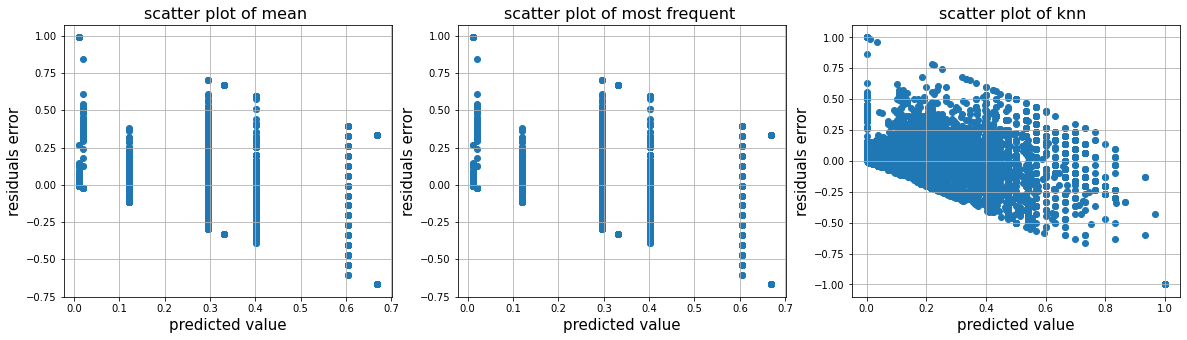

In [38]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(predicted_only_mean,residuals_mean)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of mean ".format(c),fontsize=16)
plt.grid(True)
plt.subplot(1,3,2)
plt.scatter(predicted_only_freq,residuals_mean)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of most frequent ",fontsize=16)
plt.grid(True)
plt.subplot(1,3,3)
plt.scatter(predicted_only_knn,residuals_knn)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of knn ",fontsize=16)
plt.grid(True)
plt.show()

In [39]:
# bias and variance of residuals error
import statistics 
c = sum(residuals_mean)**2/len(residuals_mean)
print('mean imputation method bais error is {}'.format(c),)
c = sum(residuals_freq)**2/len(residuals_freq)
print('most frequent imputation method bais error is {}'.format(c),)
c= sum(residuals_knn)**2/len(residuals_knn)
print('KNN imputation method bais error is {} \n'.format(c),)


res = statistics.variance(residuals_mean)
print('mean imputation method variance is {}'.format(res),)
res = statistics.variance(residuals_freq)
print('most frequent imputation method variance is {}'.format(res),)
res = statistics.variance(residuals_knn)
print('KNN imputation method variance is {}'.format(res),)

mean imputation method bais error is 0.04572002915939435
most frequent imputation method bais error is 0.04572002915939435
KNN imputation method bais error is 0.7322217810046581 

mean imputation method variance is 0.06778813338758764
most frequent imputation method variance is 0.06778813338758764
KNN imputation method variance is 0.045674960019485684


# 10% missing value

In [40]:
# mean imputation method
expected_only_mean,predicted_only_mean,residuals_mean = get_residual(expected,imp_mean_df_10per)

#most frequent imputation method
expected_only_freq,predicted_only_freq,residuals_freq = get_residual(expected,imp_freq_df_10per)

#knn imputation method
expected_only_knn,predicted_only_knn,residuals_knn = get_residual(expected,imp_knn_df_10per)

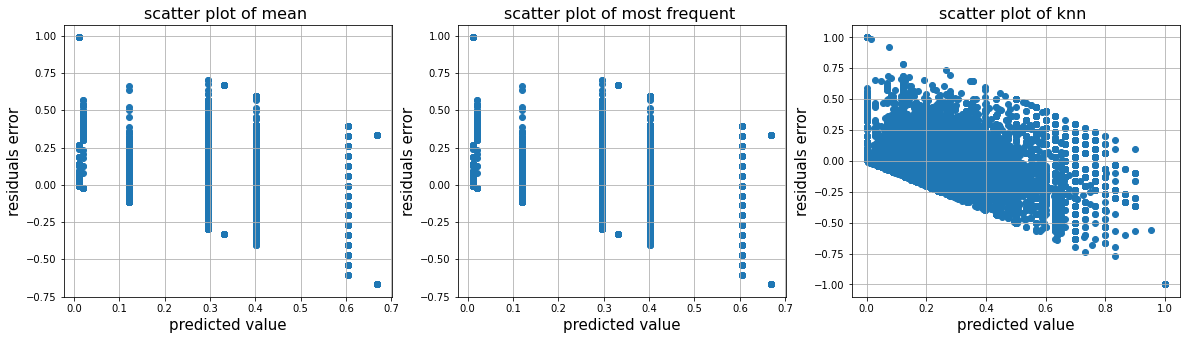

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(predicted_only_mean,residuals_mean)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of mean ".format(c),fontsize=16)
plt.grid(True)
plt.subplot(1,3,2)
plt.scatter(predicted_only_freq,residuals_mean)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of most frequent ",fontsize=16)
plt.grid(True)
plt.subplot(1,3,3)
plt.scatter(predicted_only_knn,residuals_knn)
plt.xlabel("predicted value",fontsize=15)
plt.ylabel("residuals error",fontsize=15)
plt.title("scatter plot of knn ",fontsize=16)
plt.grid(True)
plt.show()

In [42]:
# bias and variance of residuals error
import statistics 
c = sum(residuals_mean)**2/len(residuals_mean)
print('mean imputation method bais error is {}'.format(c),)
c = sum(residuals_freq)**2/len(residuals_freq)
print('most frequent imputation method bais error is {}'.format(c),)
c= sum(residuals_knn)**2/len(residuals_knn)
print('KNN imputation method bais error is {} \n'.format(c),)


res = statistics.variance(residuals_mean)
print('mean imputation method variance is {}'.format(res),)
res = statistics.variance(residuals_freq)
print('most frequent imputation method variance is {}'.format(res),)
res = statistics.variance(residuals_knn)
print('KNN imputation method variance is {}'.format(res),)

mean imputation method bais error is 0.0349964657961659
most frequent imputation method bais error is 0.0349964657961659
KNN imputation method bais error is 0.26601189888770643 

mean imputation method variance is 0.06757800589400996
most frequent imputation method variance is 0.06757800589400996
KNN imputation method variance is 0.06370055929536933


From the above data, the variance of knn grows with the increase of missing value, while the other methods do not grow, which shows that using knn can better simulate the real data when there is a large amount of missing data.
From the scatter plot, we can also see that the distribution of knn is more uniform when the amount of missing data is large, which is closer to the normal distribution and simulates the real data.

*** What are the data types? (Only numeric and categorical)**
     
     A:
        1.     education-num
        2.     age
        3.     capital-gain
        4.     capital-loss
        5.     hpw
        6.     sex_Male
        7.     sex_Female
        8.     pincode


*** Are there missing values?**

    A: no independent variable have missing data

*** What are the likely distributions of the numeric variables?**

      A:
      Aparrently, age, education-num,hpw is likely a normal distribution, capital-gain capital-loss and sex is likely a binary distribution

*** Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**
    
    A:
        1.     education-num
        2.     age
        3.     capital-gain
        4.     capital-loss
        5.     hpw
        6.     sex_Male
        7.     sex_Female
        8.     pincode
        
        
        The scatter plot, bar chart, box plot, and p -value  show that these variables are the most useful for predicting salary.

*** Which independent variables have missing data? How much?**

    A: 
    no independent variable have missing data
*** Do the training and test sets have the same data?**
    
    A:
    Yes, most of the data are the same in the test, training and validation datasets, they come from the same dataset, but there are more data points in the training dataset and some boundary values are not included in the training and validation datasets.

*** In the predictor variables independent of all the other predictor variables?**
    
     A:
     Yes, as you can see from the scatter plot, each variable is independent of the others

*** Which predictor variables are the most important?**

     A:
     In terms of permutation importance, the most important variable is the education-num
    
*** Do the ranges of the predictor variables make sense?**

    A:
    The income group is concentrated between the ages of 18 and 40, and salaries are concentrated below 50k, with very few outliers reaching above 50k. The data range is within a reasonable range

    As you can see from the pincode, the working population is concentrated in some states, in line with the population distribution

    Education level is mainly concentrated in about 0.55-0.75 (9.1-12.5 years), which is more in line with the common sense of life

    50% of the population still works about 40 hours a week

    From the investment anomaly to get out of 0 can be seen, through the investment of profits or losses belong to a very small number of people, which is also very consistent with our perception of investment

    The survey population was evenly distributed between men and women

*** What are the distributions of the predictor variables?** 
    
     A:
     From the Q-Q plot, we can know that age, education-num,hpw is likely a normal distribution. capital-gain and capital-loss is roughly bianry distribution

*** Remove outliers and keep outliers (does if have an effect of the final predictive model)?**
    
     A:
     From the box plot, we can see that the distribution of salary needs to include outliers, and people with salary greater than 50k are outliers for the distribution of salary, but they play an important role in predicting salary.

*** Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**
    
     A:
     For the  missing data, I use three different method, mean value, most frequent value and knn, which each of them compeletly cover the missing data.
    
    From the above calculation results, the variance of knn grows with the increase of missing value, while the other methods do not grow, which shows that using knn can better simulate the real data when there is a large amount of missing data.
    
    From the scatter plot, we can also see that the distribution of knn is more uniform when the amount of missing data is large, which is closer to the normal distribution and simulates the real data.

# Conclusion
From the analysis done above on the data set, The level of education is the most important to raise the salary level, so that the most efficient investment is education

# Refernces
Sckit learn offcial documentation

Eli5 official documentation

Refered Towards Data Science

Linear Regression Tutorial in kaggle 

The algorithms were referred directly from the **Sckit learn official documentation and Linear Regression Tutorial in kaggle** . Visualization was referred from **Tutorials in Matplotlab documentation**. Feature importance reference is taken from **eli5 offical documnetation**. The remaining code was written independently. 

Copyright (c) 2022 Yu An

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

[](http://)